In [2]:
from osgeo import gdal,ogr, osr
from osgeo.gdalconst import GA_ReadOnly
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
os.chdir(r'C:\Users\wiart\Downloads\Compressed\CITRA BAND 10 BAND 11')
band10= gdal.Open("LC08_L1TP_117066_20210711_20210720_01_T1_B10.TIF")
band11= gdal.Open("LC08_L1TP_117066_20210711_20210720_01_T1_B11.TIF")

In [ ]:
print ('size ',band10.RasterXSize,'x',band10.RasterYSize,
'x',band10.RasterCount)
print ('projection ',band10.GetProjection())

In [ ]:
geotransform = band10.GetGeoTransform()
print(geotransform)
# if not geotransform is None:
#     print ('mulai koordinat (',geotransform[0], ',',geotransform[3],')')
#     print ('besar pixel = (',geotransform[1], ',',geotransform[5],')')

In [ ]:
band10Clip = gdal.Warp("band10CLIP.tif", band10, cutlineDSName = "eez_iho.shp", cropToCutline = True, dstNodata = np.nan)
# clipedBandArray = band10Clip.GetRasterBand(1).ReadAsArray()
# plt.imshow(clipedBandArray)
# plt.colorbar()
# plt.show()

In [4]:
dsClip = gdal.Warp("demClip.tif", band10, cutlineDSName = "eez_iho.shp",
                   cropToCutline = True, dstNodata = np.nan)

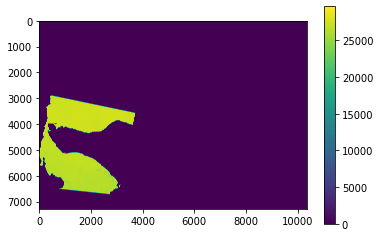

In [5]:
arrayClippedBand = dsClip.GetRasterBand(1).ReadAsArray()
plt.imshow(arrayClippedBand)
plt.colorbar()

In [31]:
# band = band10.GetRasterBand(1).ReadAsArray()
# max_value = band.GetMaximum()
# print(max_value)

max_value = np.amax(arrayClippedBand)
min_value = np.amin(arrayClippedBand)

print(max_value)
print(min_value)

29644
0


In [51]:
band_10 = band10.GetRasterBand(1)

max = band_10.GetMaximum()
if not min or not max:
    (min,max) = band_10.ComputeRasterMinMax(True)
print(max)
# plt.imshow(band_10)
# plt.colorbar()
# plt.show()
# band_11 = band11.GetRasterBand(1)
# proj = band10.GetProjection()
# print ('Tipe data band 10 :',gdal.GetDataTypeName(band_10.DataType))
# print ('Tipe data band 11 :',gdal.GetDataTypeName(band_11.DataType))

31930.0


In [49]:
max_value = np.amax(band_10)
min_value = np.amin(band_10)

print(max_value)
print(min_value)

34547
0


In [ ]:
if band_10.GetOverviewCount() > 0:
    print ('Channel contains', band_10.GetOverviewCount(),' overview images.')
    if not band_10.GetRasterColorTable() is None:
        print ('The channel contains a color table with', band_10.GetRasterColorTable().GetCount(), ' recordings')

In [ ]:
if band_11.GetOverviewCount() > 0:
    print ('hannel contains ', band_11.GetOverviewCount(),' overview images.')
    if not band_11.GetRasterColorTable() is None:
        print ('The channel contains a color table with ',
        band_11.GetRasterColorTable().GetCount(), ' recordings.')

In [ ]:
array_band10 = band_10.ReadAsArray()
cut_band10 = array_band10[3000:4000,3000:4000]
geotransform_cut = band10.GetGeoTransform()
print (array_band10)

In [ ]:
array_band11 = band_11.ReadAsArray()
cut_band11 = array_band11[3000:4000,3000:4000]
geotransform_cut = band11.GetGeoTransform()
print (cut_band10)

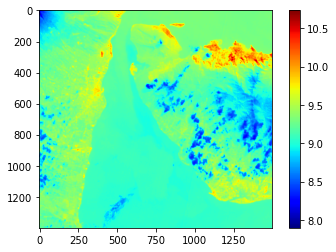

In [43]:
calib_band10 = band_10 * 0.0003342 + 0.1
# calib_NIR = (cut_NIR *mtl['REFLECTANCE_MULT_BAND_5'])+mtl['REFLECTANCE_ADD_BAND_5']
# NDVI = (calib_NIR - calib_RED)/(calib_NIR + calib_RED)
plt.imshow(calib_band10[1600:3000, 3500:5000], cmap='jet')
plt.colorbar()
plt.show()

In [ ]:
calib_band11 = ((arrayClippedBand * 0.0003342) + 0.1)
# calib_NIR = (cut_NIR *mtl['REFLECTANCE_MULT_BAND_5'])+mtl['REFLECTANCE_ADD_BAND_5']
# NDVI = (calib_NIR - calib_RED)/(calib_NIR + calib_RED)
plt.imshow(calib_band11)
plt.show()

In [6]:
band10_sat_temp = 1321.08 / np.log(774.89 / calib_band10 + 1) - 273.15

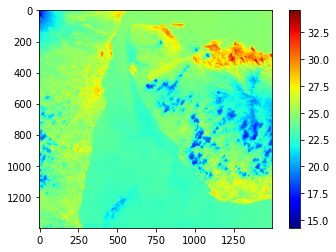

In [7]:
plt.imshow(band10_sat_temp[1600:3000, 3500:5000], cmap='jet')
plt.colorbar()
plt.show()

In [8]:
sst_band10 = -0.0197*band10_sat_temp**2 + 0.2881*band10_sat_temp + 29.004

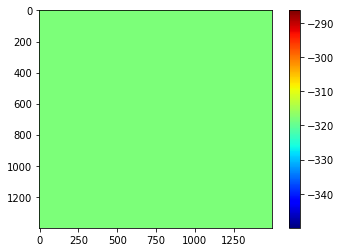

In [73]:
plt.imshow(sst_band10[1600:3000, 3500:5000], cmap='jet')
plt.colorbar()
plt.show()

In [11]:
dsClip = gdal.Warp("band10Clip.tif", band10, cutlineDSName = "eez_iho.shp",
                   cropToCutline = True, dstNodata = np.nan)

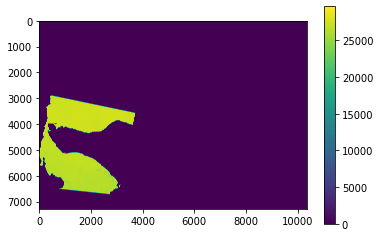

In [17]:
arrayClippedBand = dsClip.GetRasterBand(1).ReadAsArray()
plt.imshow(arrayClippedBand)
plt.colorbar()
plt.show()

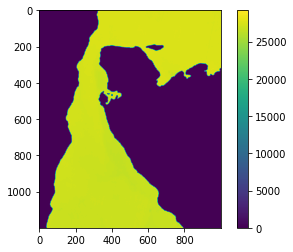

In [7]:
plt.imshow(arrayClippedBand[3800:5000, 0:1000])
plt.colorbar()
plt.show()

In [8]:
calib_band10 = arrayClippedBand * 0.0003342 + 0.1
# calib_NIR = (cut_NIR *mtl['REFLECTANCE_MULT_BAND_5'])+mtl['REFLECTANCE_ADD_BAND_5']
# NDVI = (calib_NIR - calib_RED)/(calib_NIR + calib_RED)


In [33]:
max_value = np.amax(calib_band10)
min_value = np.amin(calib_band10)

print(max_value)
print(min_value)

10.0070248
0.1


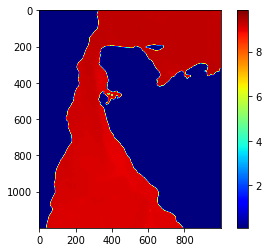

In [9]:
plt.imshow(calib_band10[3800:5000, 0:1000], cmap='jet')
plt.colorbar()
plt.show()

In [35]:
band10_sat_temp = 1321.08 / np.log(774.89 / calib_band10 + 1)

In [36]:
max_value = np.amax(band10_sat_temp)
min_value = np.amin(band10_sat_temp)

print(max_value)
print(min_value)

302.84266044289785
147.51711867576452


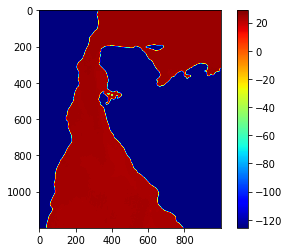

In [12]:
plt.imshow(band10_sat_temp[3800:5000, 0:1000], cmap='jet')
plt.colorbar()
plt.show()

In [13]:
sst_band10 = -0.0197*band10_sat_temp**2 + 0.2881*band10_sat_temp + 29.004

In [32]:
max_value = np.amax(sst_band10)
min_value = np.amin(sst_band10)

print(max_value)
print(min_value)

28.88579356202319
-318.12816424515194


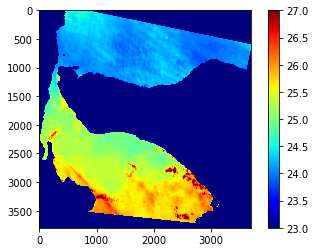

In [14]:
plt.imshow(sst_band10[3000:6800, 0:3700], cmap='jet', vmin=23, vmax=27)
plt.colorbar()
plt.show()

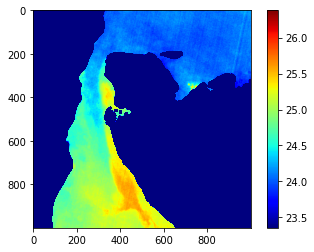

In [40]:
plt.imshow(sst_band10[3800:4800, 0:1000], cmap='jet', vmin=23.354, vmax=26.38)
plt.colorbar()
plt.show()